In [1]:

from utils import *
from annealing_schedules import *
from mcmc import *
from experiments import *

import pickle as cPickle

3.4.2


In [6]:
import numpy as np
import scipy.io
# IMPORT YOUR OWN LIBRARIES TO RUN YOUR SIMULATED ANNEALING

var = scipy.io.loadmat('observations.mat')
Y = var['Y']
Y = Y.reshape(Y.size)
W = var['W']
m = int(var['m'])
n = int(var['n'])

print(np.shape(Y))
print(np.shape(W))
print(m)
print(n)
alpha = float(m)/n
print( alpha )

(1700,)
(1700, 1000)
1700
1000
1.7


In [7]:
gt = scipy.io.loadmat('ground_truth.mat')


In [8]:
X_gt = gt['X']
X_gt = X_gt.reshape(X_gt.size)
print(X_gt.size)

1000


In [9]:
t_start = 2.0
t_freeze = 0.15
N_steps = 45000
dwell = 8000

constant_schedule = ConstantSchedule(4.0)
log_mul_schedule = LogarithmicMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=6.00)

schedule_array = [constant_schedule,log_mul_schedule]
schedule_names = ['Constant', 'Logarithmic Multiplicative']


# Running an experiment via the Experiments class.
seed = 123


n = W.shape[1]
m = W.shape[0]
alpha = float(m)/n
N = N_steps

show_plot = False
print_statistics = False


sampler = MCMC.metropolis
experiments_a = defaultdict(defaultdict)

for i,schedule in enumerate( schedule_array ): 
    
    b_v = schedule.get_schedule(N)
    schedule_name = schedule.name
    experiments_a[i] = LeanExperiment( n, alpha, N_steps, b_v, sampler, show_plot, print_statistics)
    experiments_a[i].set_observations( Y,  W )
    experiments_a[i].run()
    description = 'Running experiments with \n n:%d, alpha:%.2f, N:%d steps, Sampler:%s, \n Schedule:%s' \
                    %(  n, alpha, N, sampler.__name__, schedule_name)
    print( description )
    x_hat = experiments_a[i].x_h_min
    print( len(experiments_a[i].h_v) )
    print('Error:%.2f' %(np.mean(abs(x_hat-X_gt))))
    


Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:metropolis, 
 Schedule:Constant Schedule 4.000
18493
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:metropolis, 
 Schedule:Logarithmic Multiplicative Schedule T_S:2.00 T_F: 0 Alpha:6.00
19811
Error:0.00


In [11]:
t_start = 2.0
t_freeze = 0.15
N_steps = 45000
dwell = 8000

constant_schedule = ConstantSchedule(4.0)
schedule= constant_schedule


# Running an experiment via the Experiments class.
seed = 123


n = W.shape[1]
m = W.shape[0]
alpha = float(m)/n
N = N_steps

show_plot = False
print_statistics = False


sampler = MCMC.glauber

    
b_v = schedule.get_schedule(N)
schedule_name = schedule.name
experiment_glauber = LeanExperiment( n, alpha, N_steps, b_v, sampler, show_plot, print_statistics)
experiment_glauber.set_observations( Y,  W )
experiment_glauber.run()
description = 'Running experiments with \n n:%d, alpha:%.2f, N:%d steps, Sampler:%s, \n Schedule:%s' \
                %(  n, alpha, N, sampler.__name__, schedule_name)
print( description )
x_hat = experiment_glauber.x_h_min
print( len(experiment_glauber.h_v) )
print('Error:%.2f' %(np.mean(abs(x_hat-X_gt))))



Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:glauber, 
 Schedule:Constant Schedule 4.000
44429
Error:0.00


In [20]:
t_start = 2.0
t_freeze = 0.15
N_steps = 45000
dwell = 8000

constant_schedule = ConstantSchedule(4.0)
log_mul_schedule = LogarithmicMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=6.00)

schedule_array = [constant_schedule,log_mul_schedule]

schedule_names = ['Constant', 'Logarithmic Multiplicative']


schedule_array = [log_mul_schedule]

schedule_names = [ 'Logarithmic Multiplicative']

constant_schedule = ConstantSchedule(4.0)
exp_mul_schedule = ExponentialMultiplicativeSchedule( T_start=t_start, T_freeze=t_freeze , alpha=0.80)
log_mul_schedule = LogarithmicMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=6.00)
lin_mul_schedule = LinearMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=1.00)
lin_add_schedule = LinearAdditiveSchedule( T_start = t_start , T_freeze = t_freeze, dwell = dwell)
quad_add_schedule = QuadraticAdditiveSchedule( T_start = t_start, T_freeze = t_freeze, dwell = dwell)

schedule_array = [constant_schedule, exp_mul_schedule, log_mul_schedule, 
                  lin_mul_schedule, lin_add_schedule, quad_add_schedule]

schedule_names = ['Constant', 'Exponential Multiplicative ', 'Logarithmic Multiplicative',
                 'Linear Multiplicative', 'Linear Additive', 'Quadratic Additive']

# Running an experiment via the Experiments class.
seed = 123


n = W.shape[1]
m = W.shape[0]
alpha = float(m)/n
N = N_steps

show_plot = False
print_statistics = False


sampler = MCMC.metropolis
experiments_a = defaultdict(defaultdict)

for i,schedule in enumerate( schedule_array ): 
    
    b_v = schedule.get_schedule(N)
    schedule_name = schedule.name
    experiments_a[i] = LeanExperiment( n, alpha, N_steps, b_v, sampler, show_plot, print_statistics)
    experiments_a[i].set_observations( Y,  W )
    experiments_a[i].run()
    description = 'Running experiments with \n n:%d, alpha:%.2f, N:%d steps, Sampler:%s, \n Schedule:%s' \
                    %(  n, alpha, N, sampler.__name__, schedule_name)
    print( description )
    x_hat = experiments_a[i].x_h_min
    print( len(experiments_a[i].h_v) )
    print('Error:%.2f' %(np.mean(abs(x_hat-X_gt))))
    


Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:metropolis, 
 Schedule:Constant Schedule 4.000
21280
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:metropolis, 
 Schedule:Exponential Multiplicative Schedule T_S:2.00 T_F: 0 Alpha:0.80
37601
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:metropolis, 
 Schedule:Logarithmic Multiplicative Schedule T_S:2.00 T_F: 0 Alpha:6.00
20598
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:metropolis, 
 Schedule:Linear Multiplicative Schedule T_S:2.00 T_F: 0 Alpha:1.00
26920
Error:0.00
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:metropolis, 
 Schedule:Linear Additive Schedule T_S:2.00 T_F: 0 Dwell:8000.00
45001
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:me

Error:0.00
Error:0.00


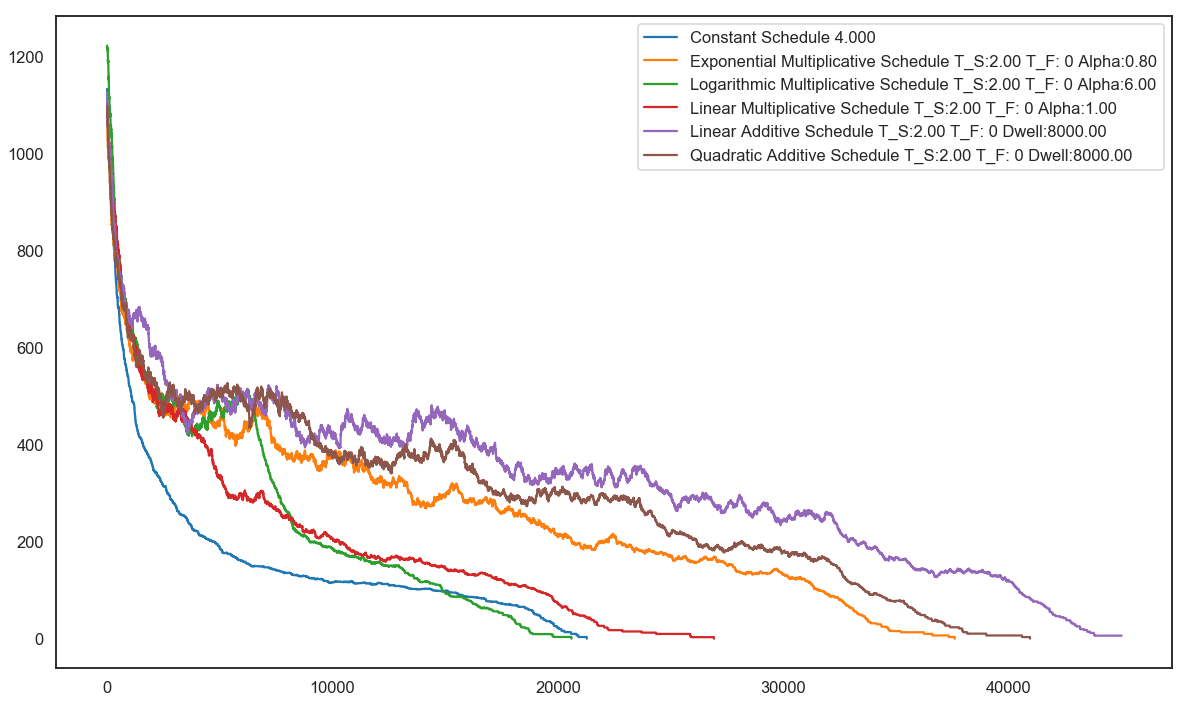

In [21]:
print('Error:%.2f' %(np.mean(abs(x_hat-X_gt))))
print('Error:%.2f' %(np.mean(abs(experiments_a[i].x_v - X_gt))))

plt.figure(figsize=(20,12))
for i,schedule in enumerate( schedule_array ): 
    plt.plot(experiments_a[i].h_v, label=schedule.name )
    
plt.legend(loc='upper right')

In [6]:
t_start = 2.0
t_freeze = 0.15
N_steps = 45000
dwell = 8000

constant_schedule = ConstantSchedule(4.0)
log_mul_schedule = LogarithmicMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=6.00)

schedule_array = [constant_schedule,log_mul_schedule]

schedule_names = ['Constant', 'Logarithmic Multiplicative']


schedule_array = [log_mul_schedule]

schedule_names = [ 'Logarithmic Multiplicative']

constant_schedule = ConstantSchedule(2.0)
exp_mul_schedule = ExponentialMultiplicativeSchedule( T_start=t_start, T_freeze=t_freeze , alpha=0.80)
log_mul_schedule = LogarithmicMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=6.00)
lin_mul_schedule = LinearMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=1.00)
lin_add_schedule = LinearAdditiveSchedule( T_start = t_start , T_freeze = t_freeze, dwell = dwell)
quad_add_schedule = QuadraticAdditiveSchedule( T_start = t_start, T_freeze = t_freeze, dwell = dwell)

schedule_array = [constant_schedule, exp_mul_schedule, log_mul_schedule, 
                  lin_mul_schedule, lin_add_schedule, quad_add_schedule]

schedule_names = ['Constant', 'Exponential Multiplicative ', 'Logarithmic Multiplicative',
                 'Linear Multiplicative', 'Linear Additive', 'Quadratic Additive']

# Running an experiment via the Experiments class.
seed = 123


n = W.shape[1]
m = W.shape[0]
alpha = float(m)/n
N = N_steps

show_plot = False
print_statistics = False


sampler = MCMC.glauber
experiments_a = defaultdict(defaultdict)

for i,schedule in enumerate( schedule_array ): 
    
    b_v = schedule.get_schedule(N)
    schedule_name = schedule.name
    experiments_a[i] = LeanExperiment( Y, W, N_steps, b_v, sampler, show_plot, print_statistics).run()
    description = 'Running experiments with \n n:%d, alpha:%.2f, N:%d steps, Sampler:%s, \n Schedule:%s' \
                    %(  n, alpha, N, sampler.__name__, schedule_name)
    print( description )
    x_hat = experiments_a[i].x_h_min
    print( len(experiments_a[i].h_v) )
    print('Error:%.2f' %(np.mean(abs(x_hat-X_gt))))
    


Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:glauber, 
 Schedule:Constant Schedule 2.000
18929
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:glauber, 
 Schedule:Exponential Multiplicative Schedule T_S:2.00 T_F: 0 Alpha:0.80
28802
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:glauber, 
 Schedule:Logarithmic Multiplicative Schedule T_S:2.00 T_F: 0 Alpha:6.00
23827
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:glauber, 
 Schedule:Linear Multiplicative Schedule T_S:2.00 T_F: 0 Alpha:1.00
22674
Error:0.00
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:glauber, 
 Schedule:Linear Additive Schedule T_S:2.00 T_F: 0 Dwell:8000.00
45001
Error:0.00
Reached this condition
Running experiments with 
 n:1000, alpha:1.70, N:45000 steps, Sampler:glauber, 
 Schedu

In [ ]:
print(experiments_a[0].h_min)
print(experiments_a[0].h_v[-1])
print(experiments_a[0].x_v - X_gt)
print(np.dot(W,experiments_a[0].x_v.reshape(-1))-Y)

In [ ]:
print(experiments_a[0].mcmc.W - W)

In [ ]:
t_start = 2.0
t_freeze = 0.15
N_steps = 60000
dwell = 8000

constant_schedule = ConstantSchedule(4.0)
exp_mul_schedule = ExponentialMultiplicativeSchedule( T_start=t_start, T_freeze=t_freeze , alpha=0.80)
log_mul_schedule = LogarithmicMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=6.00)
lin_mul_schedule = LinearMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=1.00)
lin_add_schedule = LinearAdditiveSchedule( T_start = t_start , T_freeze = t_freeze, dwell = dwell)
quad_add_schedule = QuadraticAdditiveSchedule( T_start = t_start, T_freeze = t_freeze, dwell = dwell)

schedule_array = [constant_schedule, exp_mul_schedule, log_mul_schedule, 
                  lin_mul_schedule, lin_add_schedule, quad_add_schedule]

schedule_names = ['Constant', 'Exponential Multiplicative ', 'Logarithmic Multiplicative',
                 'Linear Multiplicative', 'Linear Additive', 'Quadratic Additive']


# Running an experiment via the Experiments class.
seed = 123

n_exp = 20
n = 100
alpha = 1.0
N = N_steps

show_plot = False
print_statistics = False


sampler = MCMC.metropolis
experiments_a = defaultdict(defaultdict)
for i,schedule in enumerate( schedule_array ): 
    
    b_v = schedule.get_schedule(N)
    schedule_name = schedule.name
    experiments_a[i] = MultiExperiments( [n], [alpha], N, b_v, n_exp, sampler, 
                                          show_plot, print_statistics, seed )
    description = 'Running %d experiments with \n n:%d, alpha:%.2f, N:%d steps, Sampler:%s, \n Schedule:%s' \
                    %( n_exp, n, alpha, N, sampler.__name__, schedule_name)
    print( description )
    experiments_a[i].print_mean_statistics()

fpickle = 'Cooling_60000'
dump_cooling_comparison( schedule_names, schedule_array, experiments_a, fpickle )
